In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.torch_core import *
from fastai.callback import *
from fastai.basic_train import *
import torchvision.models as tmodels

In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [3]:
trainPath = '/home/santhosr/Data/'

In [22]:
data = (ImageItemList.from_folder(trainPath).random_split_by_pct(seed=40).label_from_folder().transform(get_transforms(),size=1024).databunch(bs=2))

In [23]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

### Training

In [28]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
   (1): ReLU(inplace)
   (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
   (3): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
   (4): ReLU(inplace)
   (5): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
   (6): ReLU(inplace)
   (7): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace)
   (9): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
   (10): ReLU(inplace)
   (11): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
   (12): ReLU(inplace)
   (13): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (14): ReLU(inplace)
   (15): Conv2d(128, 32, kernel_size=(1, 1), stride=(1, 1))
   (16): ReLU(inplace)
   (17): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
   (18): ReLU(inplace)
   (19): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (20): ReLU(inplace)
   (21): MaxPool2d(kernel_size=3, stride=2,

In [10]:
learn.model.to

<bound method Module.to of Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


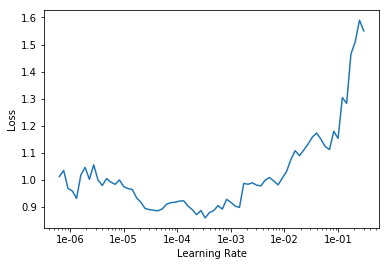

In [6]:
learn.lr_find()
learn.recorder.plot()

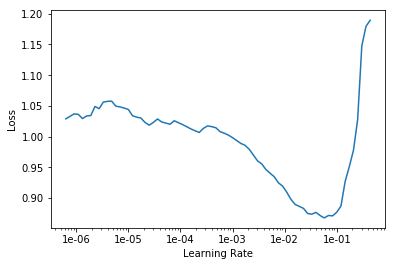

In [17]:
# learn.lr_find()
# learn.recorder.plot()

In [7]:
learn.freeze()

In [16]:
class ModelTrackerCallback(TrackerCallback):
    "A `TrackerCallback` that saves the model when monitored quantity is best."
    def __init__(self, learn:Learner, monitor:str='val_loss', mode:str='auto', prefix:str='resnet50'):
        super().__init__(learn, monitor=monitor, mode=mode)
        
        self.bestAcc = 0.0001
        super().__post_init__()

    def on_epoch_end(self, epoch, **kwargs:Any)->None:
        "Compare the value monitored to its best score and maybe save the model."

        acc = float(self.learn.recorder.metrics[epoch-1][0])
        val_loss = self.learn.recorder.val_losses[epoch-1]

        if acc>self.bestAcc:
            self.bestAcc = acc
            self.learn.save(f'model_acc{int(acc*1000)}_loss{int(val_loss*1000)}')



In [17]:
best_model_cb = partial(ModelTrackerCallback)
learn.callback_fns.append(best_model_cb)

In [10]:
learn.fit_one_cycle(1,0.00001)

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: 

In [21]:
learn.fit(5,1.0e-5)

epoch,train_loss,valid_loss,accuracy
1,0.910847,0.774752,0.505587
2,0.835004,0.786971,0.525140
3,0.874231,0.791939,0.505587
4,0.799925,0.809553,0.491620
5,0.879497,0.834340,0.486034


In [9]:
len(learn.recorder.lrs)

3585

In [15]:
len(learn.recorder.moms)

69

In [16]:
len(data.train_dl)

717

In [17]:
717/2

358.5

In [68]:
float(learn.recorder.metrics[1][0])

0.5

In [82]:
os.getcwd()

'/home/santhosr/Documents/Codes/FastAI'

In [7]:
learn.fit(1,slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.849070,0.662560,0.617318


### Model Evaluation

In [7]:
# learn.load('/home/santhosr/Data/models/model_acc812_loss429')
learn.load('/home/santhosr/Data/models/model_acc790_loss502')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (1434 items)
[Category C, Category C, Category C, Category C, Category C]...
Path: /home/santhosr/Data
x: ImageItemList (1434 items)
[Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 3328, 2560)]...
Path: /home/santhosr/Data;

Valid: LabelList
y: CategoryList (358 items)
[Category C, Category NC, Category NC, Category NC, Category C]...
Path: /home/santhosr/Data
x: ImageItemList (358 items)
[Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 3328, 2560), Image (3, 3328, 2560), Image (3, 3328, 2560)]...
Path: /home/santhosr/Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Seq

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

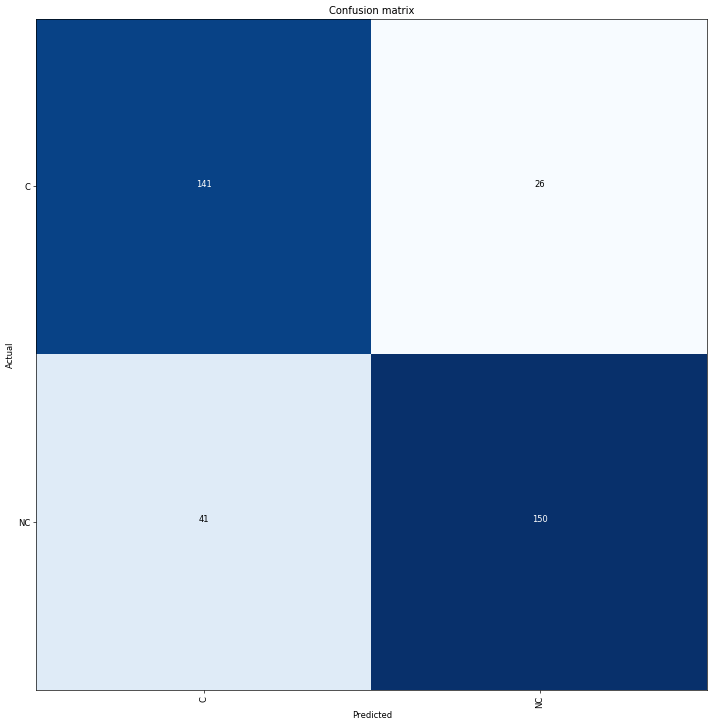

In [8]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [9]:
(141+150)/358.0

0.8128491620111732

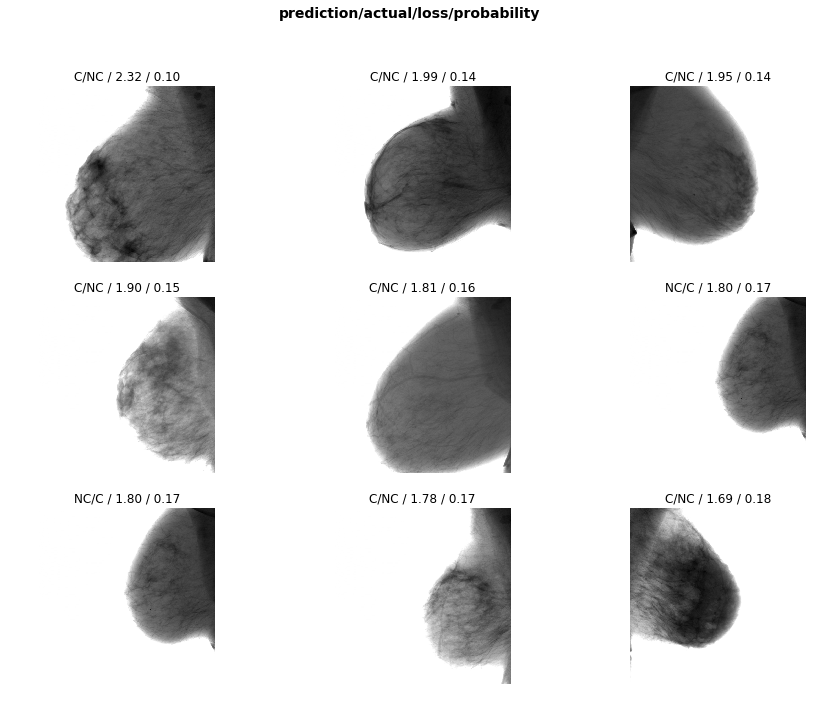

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [12]:
len(data.valid_ds)

358

In [10]:
valData = data.valid_ds
trainData = data.train_ds

In [11]:
valFiles = [i.name for i in list(valData.x.items)]
trainFiles = [i.name for i in list(trainData.x.items)]

In [12]:
def cleanFileName(x):
    
    if x.count("_")==4:
        return "_".join(x.split("_")[:4])
    else:
        return "_".join(x.split("_")[:3])

cleanValFiles = [cleanFileName(i) for i in valFiles]
cleanTrainFiles = [cleanFileName(i) for i in trainFiles]

In [34]:
### BACK-UP Code to check scoring

# correct = 0.0
# total = 0.0

# for i in tqdm(range(len(valData))):
    
#     x = valData.x[i]
#     predLabel,labelValue,pred = learn.predict(x)
    
#     trueLabel = valData.y[i].data
#     predLabel = int(predLabel.data.numpy())
    
#     fileName = cleanFileName(valData.x.items[i].name)
    
#     if fileName not in cleanTrainFiles:
#         total +=1
#         if trueLabel == predLabel:
#             correct += 1
    
# print(correct/total)    

100%|██████████| 358/358 [02:31<00:00,  2.49it/s]

0.8064516129032258


Code to run test accuracy of predictions for validation images that are not present in the Training data

In [13]:

output = []

prob,y = learn.get_preds(with_loss=False)
prob = prob.numpy()
predLabel = [np.argmax(i) for i in prob]
y = list(y.numpy())

correct = 0.0

for i in range(len(valData)):
    
    if predLabel[i] == y[i]:
        correct += 1
        
    output.append([valData.x.items[i].name, cleanFileName(valData.x.items[i].name), y[i], prob[i][0], prob[i][1], predLabel[i] ] )

print(correct/len(valData))




0.8128491620111732


In [14]:
df = pd.DataFrame(output)
df.columns = ['fileName','patient','truth','Cancer_Prob','NCancer_Prob','Predicted_Class']
df.head()

,fileName,patient,truth,Cancer_Prob,NCancer_Prob,Predicted_Class
0,4197195_R_MLO_1_53.jpg,4197195_R_MLO_1,0,0.809495,0.190505,0
1,4766139_L_MLO_1.jpg,4766139_L_MLO,1,0.609929,0.390071,0
2,4390055_R_MLO_1.jpg,4390055_R_MLO,1,0.617239,0.382761,0
3,4763490_L_MLO_1.jpg,4763490_L_MLO,1,0.369944,0.630056,1
4,3939689_L_MLO_1_54.jpg,3939689_L_MLO_1,0,0.904967,0.095033,0


In [15]:
accuracy_score(df.truth, df.Predicted_Class)

0.8128491620111732

#### For patients which dont have images in Training data

In [16]:
dfValid = df.loc[~df.patient.isin(cleanTrainFiles)]
dfValid

,fileName,patient,truth,Cancer_Prob,NCancer_Prob,Predicted_Class
1,4766139_L_MLO_1.jpg,4766139_L_MLO,1,0.609929,0.390071,0
2,4390055_R_MLO_1.jpg,4390055_R_MLO,1,0.617239,0.382761,0
3,4763490_L_MLO_1.jpg,4763490_L_MLO,1,0.369944,0.630056,1
5,4911891_L_MLO_1.jpg,4911891_L_MLO,1,0.862967,0.137033,0
6,4192299_R_MLO_1.jpg,4192299_R_MLO,1,0.815351,0.184649,0
7,4341451_R_MLO_1.jpg,4341451_R_MLO,1,0.460393,0.539607,1
8,3076407_L_MLO_1.jpg,3076407_L_MLO,1,0.159671,0.840329,1
9,4193671_R_MLO_1.jpg,4193671_R_MLO,1,0.372258,0.627742,1
10,3681064_L_MLO_1.jpg,3681064_L_MLO,1,0.076042,0.923958,1
11,3810714_R_MLO_1.jpg,3810714_R_MLO,1,0.629209,0.370791,0


In [17]:
len(dfValid)

248

In [18]:
accuracy_score(dfValid.truth, dfValid.Predicted_Class)

0.7943548387096774

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(dfValid.truth, dfValid.Predicted_Class)

array([[ 47,  10],
       [ 38, 153]])

In [38]:
np.sum(dfValid.truth)

191

### Upsampling

In [35]:
cFolder = '/home/santhosr/Data/C'
fileList = os.listdir(cFolder)
os.chdir(cFolder)

In [45]:
for i in tqdm(range(650)):
    fullName = np.random.choice(fileList)
    
    file = fullName.split(".")[0]
    fullName = os.path.join(cFolder,fullName)
    
    newFile = file+"_"+str(np.random.choice(list(range(100))))+".jpg"
    
    while(newFile in os.listdir(cFolder)):
        newFile = file+"_"+str(np.random.choice(list(range(100))))+".jpg"
    
    
    newFile = os.path.join(cFolder,newFile)
        
#     print(newFile)
    !cp  $fullName $newFile
    

100%|██████████| 650/650 [01:55<00:00,  5.65it/s]


In [6]:
learn.load('resnet_f1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (914 items)
[Category C, Category C, Category C, Category C, Category C]...
Path: /home/santhosr/Data
x: ImageItemList (914 items)
[Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 3328, 2560), Image (3, 4096, 3328), Image (3, 4096, 3328)]...
Path: /home/santhosr/Data;

Valid: LabelList
y: CategoryList (228 items)
[Category NC, Category NC, Category NC, Category NC, Category NC]...
Path: /home/santhosr/Data
x: ImageItemList (228 items)
[Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 3328, 2560), Image (3, 3328, 2560), Image (3, 4096, 3328)]...
Path: /home/santhosr/Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Seq

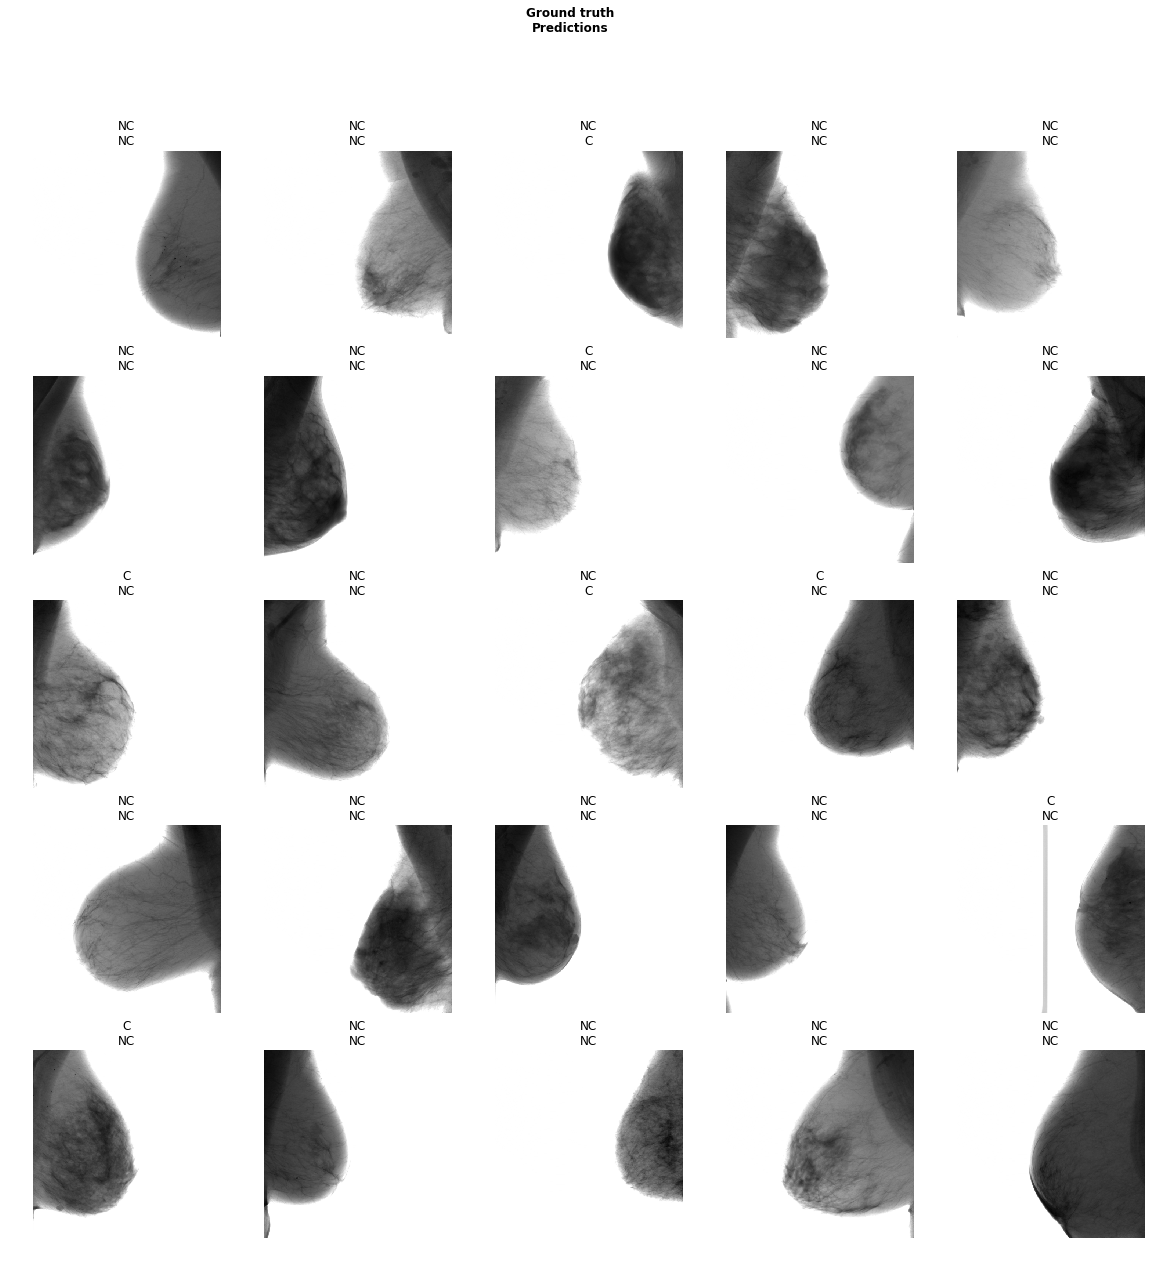

In [7]:
learn.show_results()

In [51]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

In [12]:
interp.most_confused(min_val=2)

[('C', 'NC', 40), ('NC', 'C', 7)]

### Training full network

In [54]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(5, max_lr=slice((1e-5)/3, 5*(1e-5)))

epoch,train_loss,valid_loss,accuracy
1,0.715876,0.735850,0.519553
2,0.721779,0.686966,0.555866
3,0.718689,0.698157,0.558659
4,0.706883,0.713905,0.561453
5,0.747947,0.693524,0.544693


In [58]:
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.train:

fit_one_cycle(cyc_len:int, max_lr:Union[float, Collection[float], slice]=slice(None, 0.003, None), moms:Tuple[float, float]=(0.95, 0.85), div_factor:float=25.0, pct_start:float=0.3, wd:float=None, callbacks:Union[Collection[fastai.callback.Callback], NoneType]=None, **kwargs) -> None method of fastai.basic_train.Learner instance
    Fit a model following the 1cycle policy.



In [60]:
learn.fit(4)

epoch,train_loss,valid_loss,accuracy
1,0.807570,0.876643,0.519553
2,0.858191,0.708462,0.516760
3,0.766679,0.756546,0.505587
4,0.777586,0.698144,0.547486


In [46]:
data.classes

['C', 'NC']

In [23]:
loss = nn.CrossEntropyLoss(weight=torch.tensor([15.0,1.0]))
learn.loss_func = loss

In [26]:
learn.loss_func.weight

tensor([15.,  1.])